In [10]:
# Main Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Machine Learning Library (sklearn)
# ML - Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin, clone
# ML - Feature Selection
from sklearn.feature_selection import SelectKBest, SelectFromModel

# ML - Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
# ML - Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay, ValidationCurveDisplay, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
# ML - Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# ML - Model Interpretation
from sklearn.inspection import permutation_importance, partial_dependence
# ML - Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, PrecisionRecallDisplay

# Imbalance Library
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Advance Feature Engineering
from feature_engine.imputation import MeanMedianImputer, AddMissingIndicator
from feature_engine.creation import CyclicalFeatures
from feature_engine.encoding import RareLabelEncoder

from category_encoders import BinaryEncoder

# Section 1: Business Understanding

## Konteks Permasalahan

Industri perhotelan menghadapi tantangan besar dalam hal pembatalan reservasi kamar oleh pelanggan. Salah satu hotel di Portugal mencatat tingkat pembatalan yang cukup tinggi, yang berdampak langsung pada:

- Penurunan pendapatan karena kamar yang dipesan tidak terisi.
- Gangguan dalam perencanaan operasional harian.
- Ketidakpastian dalam penyediaan layanan dan staf.

Masalah ini terutama dirasakan oleh **tim manajemen reservasi dan pemasaran**, yang harus menyesuaikan strategi agar tetap dapat mengisi kamar dan mempertahankan pendapatan.

---

## Problem Statement

Tingkat pembatalan pemesanan kamar yang tinggi menjadi tantangan serius bagi operasional hotel. Setiap kali terjadi pembatalan, kamar yang seharusnya bisa dihuni menjadi kosong, sehingga pendapatan hilang dan efisiensi operasional menurun. Dalam industri yang sangat bergantung pada perencanaan kapasitas seperti perhotelan, ketidakpastian semacam ini sangat merugikan. Oleh karena itu, perlu ada sistem yang dapat membantu memprediksi pemesanan mana yang berisiko tinggi untuk dibatalkan.

*Nature Problem:*
- Banyak pelanggan melakukan pembatalan secara tiba-tiba, bahkan setelah sebelumnya pernah membatalkan beberapa kali.
- Beberapa fitur yang relevan dalam data menunjukkan pola tertentu terhadap kemungkinan pembatalan, seperti jenis deposit, jumlah pembatalan sebelumnya, atau jenis saluran pemesanan.
- Belum ada sistem berbasis data yang membantu staf hotel untuk mengantisipasi kemungkinan pembatalan sejak awal.

*Objective:*
- Membangun **model prediktif** berbasis machine learning untuk mengidentifikasi apakah suatu pemesanan berisiko dibatalkan atau tidak.
- Mengurangi jumlah pembatalan aktual dengan memberikan peringatan dini berdasarkan output model.
- Memberikan **insight yang jelas** bagi tim reservasi dan pemasaran dalam menentukan kebijakan deposit atau strategi promosi yang lebih tepat.

**Apa dampaknya jika tidak diselesaikan?**  
- Turunnya tingkat hunian hotel.
- Kehilangan peluang pendapatan dari pelanggan lain.
- Biaya operasional tidak sebanding dengan pendapatan yang diterima.

---

## Goals (Tujuan)

Melalui proyek ini, pihak manajemen hotel ingin memiliki kemampuan untuk memprediksi apakah sebuah reservasi berisiko tinggi untuk dibatalkan atau tidak. Dengan adanya model prediktif ini, hotel dapat lebih proaktif dalam menyusun strategi, seperti penerapan kebijakan deposit atau pendekatan khusus terhadap pelanggan tertentu, guna mengurangi tingkat pembatalan dan meningkatkan pendapatan.

Dari sisi teknis, proyek ini bertujuan untuk:
- > Membangun model klasifikasi berbasis machine learning yang mampu mengidentifikasi reservasi dengan risiko pembatalan tinggi.
- > Mencapai F1 Score minimal 80% pada data uji, dengan keseimbangan antara precision dan recall agar prediksi tetap akurat dan dapat diandalkan dalam praktik bisnis nyata.
- > Memberikan interpretasi terhadap fitur-fitur utama yang paling berpengaruh terhadap pembatalan, sehingga bisa menjadi dasar pengambilan keputusan strategis oleh tim manajemen hotel.
---

## Analytical Approach:

Pendekatan yang digunakan dalam proyek ini adalah membangun model klasifikasi untuk memprediksi apakah suatu reservasi akan dibatalkan atau tidak. Berikut adalah langkah-langkah pendekatan analitik yang digunakan:

- **Mengidentifikasi Pola Pembatalan Berdasarkan Data Historis**\
  Menganalisis fitur-fitur penting seperti `deposit_type`, `market_segment`, `previous_cancellations`, dan `days_in_waiting_list` untuk melihat bagaimana pola-pola tersebut berkaitan dengan perilaku pembatalan pelanggan.

- **Menyiapkan Fitur yang Relevan**\
  Melakukan pemilihan fitur dan rekayasa fitur (feature engineering) untuk memastikan model dapat menangkap sinyal pembatalan dengan lebih baik. Contohnya adalah mengelompokkan negara asal pelanggan dan menormalisasi variabel numerik jika diperlukan.

- **Membangun Model Klasifikasi**\
  Menggunakan algoritma supervised learning (seperti Random Forest, Logistic Regression, atau XGBoost) untuk mempelajari hubungan antara fitur-fitur pemesanan dengan label `is_canceled`.

- **Menghadapi Ketidakseimbangan Kelas**\
  Karena data memiliki proporsi yang tidak seimbang antara pemesanan yang dibatalkan dan tidak, maka digunakan teknik penyeimbangan seperti SMOTE atau penyesuaian class weight.

- **Mengoptimalkan Akurasi dan Kegunaan Bisnis**\
  Fokus pada metrik evaluasi seperti F1 Score, Precision, dan Recall untuk mendapatkan keseimbangan antara mendeteksi risiko pembatalan dan menghindari peringatan yang salah (false positives).

Dengan pendekatan ini, model diharapkan tidak hanya mampu memberikan prediksi yang akurat, tetapi juga memberikan wawasan bisnis yang berguna untuk pengambilan keputusan strategis hotel.

---

## Evaluation Metrics

Agar solusi yang dikembangkan dapat digunakan secara efektif dalam operasional hotel, metrik evaluasi dibagi menjadi dua kategori: **dampak bisnis** dan **metrik machine learning utama** untuk pemilihan serta tuning model.


### 1. Rasio Pemesanan Valid yang Salah Ditandai (False Positive Rate)
- **Definisi**: Persentase reservasi yang sebenarnya valid (tidak dibatalkan), namun diprediksi sebagai akan dibatalkan oleh model.
- **Formula**:
  - False Positive Rate = FP / (FP + TN)
- **Dampak Bisnis**: Jika terlalu tinggi, model akan “menakut-nakuti” hotel untuk mengambil tindakan pencegahan yang tidak perlu (misalnya meminta deposit dari pelanggan yang sebenarnya tidak akan membatalkan). Hal ini bisa mengganggu pengalaman pelanggan dan berdampak pada reputasi hotel.


### 2. Recall — *Kemampuan Menangkap Pembatalan Aktual*
- **Definisi**: Seberapa banyak dari total pembatalan nyata yang berhasil ditangkap oleh model.
- **Formula**:
  - Recall = TP / (TP + FN)
- **Dampak Bisnis**: Semakin tinggi recall, semakin baik sistem dalam mengidentifikasi reservasi berisiko tinggi. Ini penting agar hotel dapat bertindak cepat sebelum kerugian terjadi.


### 3. **F1 Score — Metrik Utama untuk Seleksi Model**
- F1 Score menggabungkan precision dan recall dalam satu nilai harmonis.
    - Precision = TP / (TP + FP)
    - Recall = TP / (TP + FN)
    - F1 Score = 2 × (Precision × Recall) / (Precision + Recall)

- **Alasan pemilihan**:
  - Hotel membutuhkan keseimbangan: mampu menghindari pembatalan (recall tinggi) tanpa terlalu sering salah menandai pelanggan baik (precision tinggi).
  - F1 Score cocok untuk data dengan kelas tidak seimbang, seperti dalam kasus ini (sekitar 63% tidak batal dan 37% batal).


| Jenis Kesalahan     | Konsekuensi Bisnis Utama                                                               |
|---------------------|-----------------------------------------------------------------------------------------|
| **False Negative**  | Reservasi berisiko tinggi tidak terdeteksi → kamar kosong, pendapatan hilang           |
| **False Positive**  | Reservasi yang valid dianggap berisiko → pengalaman pelanggan terganggu, reputasi buruk |

Dengan fokus pada F1 Score, kita berupaya menjaga keseimbangan deteksi pembatalan tanpa mengorbankan pelanggan yang tidak bersalah.

---

## Expected Outcomes

- Mengurangi potensi kerugian pendapatan dengan cara mengantisipasi pembatalan reservasi sebelum terjadi.
- Memberikan peringatan dini kepada staf hotel terhadap pemesanan yang berisiko tinggi dibatalkan, sehingga dapat ditindaklanjuti dengan strategi pencegahan seperti permintaan deposit.
- Meningkatkan efisiensi operasional dengan memastikan perencanaan kamar dan sumber daya lebih akurat.
- Membantu tim pemasaran menyusun strategi promosi yang lebih tepat sasaran berdasarkan pola perilaku pelanggan.

---

## Limitation and Challenge

- Dataset memiliki distribusi kelas yang tidak seimbang, di mana sebagian besar pemesanan tidak dibatalkan, sehingga model berisiko bias terhadap kelas mayoritas.
- Beberapa fitur penting seperti harga kamar atau waktu pemesanan (lead time) tidak tersedia, yang bisa membatasi akurasi model.
- Perubahan tren pasar (misalnya akibat pandemi atau musim liburan) dapat membuat model yang dilatih pada data historis menjadi kurang relevan di masa depan.
- Interpretasi model untuk non-teknikal user perlu disederhanakan agar dapat dipahami dan digunakan secara efektif oleh tim hotel.

---
---

# Section 2: Data Understanding

## 2.1 General Information

In [11]:
# Load dataset
df = pd.read_csv('data_hotel_booking_demand.csv')

In [12]:
print("General Information:")
display(df.info())

print("5 First Rows:")
display(df.head())

print("5 Last Rows:")
display(df.tail())

print("5 Random Rows:")
display(df.sample(5))

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


None

5 First Rows:


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


5 Last Rows:


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


5 Random Rows:


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
5969,PAN,Online TA,0,0,No Deposit,0,Transient,D,0,1,0
76339,ESP,Online TA,0,0,No Deposit,0,Transient-Party,A,0,1,0
64618,PRT,Corporate,0,0,Non Refund,0,Transient,A,0,0,1
23261,PRT,Offline TA/TO,0,1,No Deposit,0,Contract,D,0,0,0
78715,FRA,Offline TA/TO,0,0,No Deposit,0,Transient,D,0,1,0


In [17]:
print("Numerical Summary:")
display(df.describe())

print("Categorical Summary:")
display(df.describe(include='object'))

Numerical Summary:


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


Categorical Summary:


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


Dataset yang digunakan dalam proyek ini merupakan data pemesanan dari sebuah hotel di Portugal. Setiap baris merepresentasikan satu reservasi, dan setiap kolom menyimpan informasi terkait karakteristik pemesanan maupun perilaku pelanggan.


### Sumber Data
Data berasal dari sistem internal hotel dan telah dibersihkan dari informasi pribadi pelanggan. File tersedia dalam format CSV dan dapat diakses secara langsung tanpa kendala.


## 2.2 Feature Information

Fitur-fitur dalam dataset terdiri dari kombinasi data kategorikal dan numerik, dengan satu kolom target (`is_canceled`) yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0). Beberapa fitur penting antara lain:

| **Nama Fitur**               | **Deskripsi**                                                                 | **Impact to Business**                                                                                                                   |
| ---------------------------- | ----------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `country`                    | Negara asal pelanggan.                                                        | Membantu memahami pasar terbesar dan mengidentifikasi pola pembatalan dari negara tertentu untuk strategi pemasaran yang lebih tepat.   |
| `market_segment`              | Segmen pasar tempat pemesanan dilakukan (misal: Online, Offline, Corporate).  | Segmen tertentu mungkin memiliki tingkat pembatalan lebih tinggi, sehingga strategi promosi dan kebijakan pembayaran bisa disesuaikan.  |
| `previous_cancellations`     | Jumlah pembatalan yang pernah dilakukan pelanggan sebelum pemesanan ini.       | Riwayat pembatalan tinggi dapat menjadi indikator risiko pembatalan di masa depan, membantu dalam kebijakan deposit atau konfirmasi.    |
| `booking_changes`            | Jumlah perubahan yang dilakukan terhadap pemesanan sebelum check-in.           | Banyak perubahan bisa menandakan ketidakpastian pelanggan, sehingga hotel bisa memberi perhatian lebih pada pemesanan tersebut.         |
| `deposit_type`               | Jenis deposit yang digunakan pelanggan untuk menjamin pemesanan.               | Deposit non-refundable cenderung menurunkan risiko pembatalan, sehingga mempengaruhi strategi harga dan kebijakan reservasi.            |
| `days_in_waiting_list`       | Lama (hari) pemesanan berada di daftar tunggu sebelum dikonfirmasi.             | Waktu tunggu panjang bisa mempengaruhi minat pelanggan dan meningkatkan risiko pembatalan.                                              |
| `customer_type`              | Tipe pelanggan (misal: transient, contract, group).                            | Tipe pelanggan tertentu mungkin lebih stabil dalam reservasi, membantu menentukan target promosi dan program loyalitas.                 |
| `reserved_room_type`         | Kode jenis kamar yang dipesan pelanggan.                                        | Jenis kamar tertentu mungkin lebih sering dibatalkan; informasi ini dapat membantu dalam manajemen inventori kamar.                     |
| `required_car_parking_space` | Jumlah ruang parkir yang diminta pelanggan.                                     | Bisa menjadi indikator jenis pelanggan (keluarga, bisnis) yang mungkin memiliki perilaku reservasi lebih stabil.                         |
| `total_of_special_request`   | Jumlah permintaan khusus dari pelanggan.                                        | Pelanggan dengan banyak permintaan khusus cenderung lebih berniat untuk datang, sehingga risiko pembatalan lebih rendah.                |
| `is_canceled`                | Apakah pemesanan dibatalkan (1) atau tidak (0).                                 | Menjadi label target untuk model prediksi; membantu mengukur keberhasilan strategi pencegahan pembatalan.                               |



### Keterkaitan Data dengan Masalah Bisnis

Setiap fitur dalam dataset memberikan informasi potensial yang bisa digunakan untuk mengidentifikasi pola pembatalan. Misalnya:
- Pelanggan dengan `deposit_type` = No Deposit cenderung memiliki risiko pembatalan lebih tinggi.
- Reservasi dari `market_segment` tertentu memiliki karakteristik pembatalan yang berbeda.


### Kekuatan dan Keterbatasan Dataset

**Kekuatan:**
- Dataset cukup besar (>80.000 baris), sehingga representatif untuk pelatihan model.
- Fitur-fitur seperti riwayat pembatalan, jenis saluran pemesanan, dan tipe pelanggan sangat relevan terhadap target prediksi.

**Keterbatasan:**
- Tidak semua variabel potensial tersedia, seperti harga kamar, waktu pemesanan (lead time), atau alasan pembatalan.
- Distribusi target tidak seimbang: sebagian besar pemesanan tidak dibatalkan (~63%), sehingga perlu strategi khusus dalam training model.

## 2.3 Feature Type
Berikut adalah ringkasan fitur yang tersedia dalam dataset dan bagaimana mereka dikelompokkan.

In [14]:
# Cek tipe data unik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Fitur kategorikal:", categorical_cols)
print("Fitur numerik:", numerical_cols)

Fitur kategorikal: ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
Fitur numerik: ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']


## 2.4 Target Distribution (is_canceled)

In [15]:
# Distribusi target
df['is_canceled'].value_counts(normalize=True) * 100


is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

> Dari hasil distribusi, terlihat bahwa sekitar 37% pemesanan dibatalkan dan 63% tidak. Ini menunjukkan adanya ketidakseimbangan kelas yang perlu diperhatikan saat membuat model.

---

### Insight Awal

Beberapa fitur awal yang terlihat relevan untuk prediksi pembatalan adalah:
- `deposit_type`
- `market_segment`
- `previous_cancellations`
- `days_in_waiting_list`

Kita akan menjelajahi hubungan antar fitur lebih lanjut pada tahap eksplorasi dan feature selection.


# Section 3: Data Generation

In [18]:
# Creating a copy of the DataFrame for manipulation
df_eda = df.copy()

In [206]:
# Create seen & unseen dataframes

data_seen, data_unseen = train_test_split(df, test_size=0.2, 
                                          random_state=42, 
                                          stratify=df["is_canceled"]) # stratify digunakan untuk menjaga proporsi target antara data seen dan data unseen
                                                                    # stratify khusus classification

data_seen.to_csv("data_seen.csv", index=False)
data_unseen.to_csv("data_unseen.csv", index=False)

In [20]:
# Creating training and test sets
data_train, data_test = train_test_split(data_seen, test_size=0.2, random_state=42, stratify=data_seen["is_canceled"])

In [21]:
print("data unseen size:", data_unseen.shape)
print("data seen size:", data_seen.shape)
print("--> data train size:", data_train.shape)
print("--> data test size:", data_test.shape)

data unseen size: (16715, 11)
data seen size: (66858, 11)
--> data train size: (53486, 11)
--> data test size: (13372, 11)


# Section 4: Data Exploration

In [22]:
from skrub import TableReport


# General table report
report = TableReport(df_eda)
report

Processing column  11 / 11


,,,,,,,,,,,


##  4.1 Identifying Missing Value

In [24]:
# Data Cleaning
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[GAB, TMP]"
1,market_segment,object,0,0.00,8,"[Undefined, Complementary]"
2,previous_cancellations,int64,0,0.00,15,"[26, 3]"
3,booking_changes,int64,0,0.00,19,"[16, 1]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[22, 31]"
6,customer_type,object,0,0.00,4,"[Transient, Contract]"
7,reserved_room_type,object,0,0.00,10,"[G, L]"
8,required_car_parking_spaces,int64,0,0.00,5,"[8, 2]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 5]"


### Penanganan Missing Values

Dari hasil `df.info()`, hanya kolom `country` yang memiliki sedikit nilai kosong (kurang dari 0.5%).

Kita akan isi missing value di kolom `country` dengan label 'Unknown'.


In [26]:
# # Isi missing value di kolom country
# df_eda['country'].fillna('Unknown', inplace=True)
df.fillna({'country': 'unknown'}, inplace=True)

Mari kita check informasi dataframenya lagi

In [28]:
# Data Cleaning
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,163,"[SYC, AZE]"
1,market_segment,object,0,0.0,8,"[Groups, Aviation]"
2,previous_cancellations,int64,0,0.0,15,"[0, 21]"
3,booking_changes,int64,0,0.0,19,"[20, 16]"
4,deposit_type,object,0,0.0,3,"[Refundable, Non Refund]"
5,days_in_waiting_list,int64,0,0.0,115,"[57, 44]"
6,customer_type,object,0,0.0,4,"[Transient-Party, Group]"
7,reserved_room_type,object,0,0.0,10,"[E, C]"
8,required_car_parking_spaces,int64,0,0.0,5,"[1, 8]"
9,total_of_special_requests,int64,0,0.0,6,"[1, 2]"


ok sekarang nilai kosong pada kolom `country` sudah kita ganti menjadi  `unknown`

## 4.2 Identifying Duplicated Values

In [29]:
# Exact Duplicate
if df_eda.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df_eda.duplicated().sum())
    duplicated_row = df_eda[df_eda.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

Duplicate rows found.
Total duplicate rows: 73371


Dataset menunjukkan sekitar 73.371 baris yang terdeteksi sebagai duplikat. Namun:

- Tidak tersedia kolom unik seperti ID pemesanan.
- Banyak entri yang secara fitur identik (misal: 2 pelanggan dari negara yang sama, memesan jenis kamar yang sama, dll).
- Setiap baris kemungkinan tetap merepresentasikan pemesanan berbeda.

Maka **data tidak dihapus**, dan seluruh baris tetap dipertahankan untuk menjaga distribusi dan volume data.

In [30]:
# Daftar kolom yang tidak kita sertakan untuk pengecekan duplikat parsial
exclude_cols = ['is_canceled']  # kolom target, tidak perlu dikecualikan kalau mau cek semua kolom

# Ambil kolom yang akan dicek
nonunique_columns = [col for col in df.columns if col not in exclude_cols]

# Cek duplikat parsial
if df.duplicated(subset=nonunique_columns).any():
    print("Partial duplicate rows found.")
    duplicate_rows = df[df.duplicated(subset=nonunique_columns, keep=False)]
    print(f"Jumlah partial duplicate: {duplicate_rows.shape[0]}")
else:
    print("No partial duplicate rows found.")


Partial duplicate rows found.
Jumlah partial duplicate: 78913


## 4.3 Target Distribution Analysis

In [31]:
display(df_eda["is_canceled"].value_counts().apply(lambda x: f"{x} ({round(x/len(df_eda)*100, 2)}%)"))
print("The target is imbalanced.")

is_canceled
0    52795 (63.17%)
1    30778 (36.83%)
Name: count, dtype: object

The target is imbalanced.


## 4.4 Feature Analysis

### 4.4.1 Feature Distribution Analysis

In [32]:
# Feature Distribution
TableReport(df_eda.drop("is_canceled", axis=1))

Processing column  10 / 10


,,,,,,,,,,


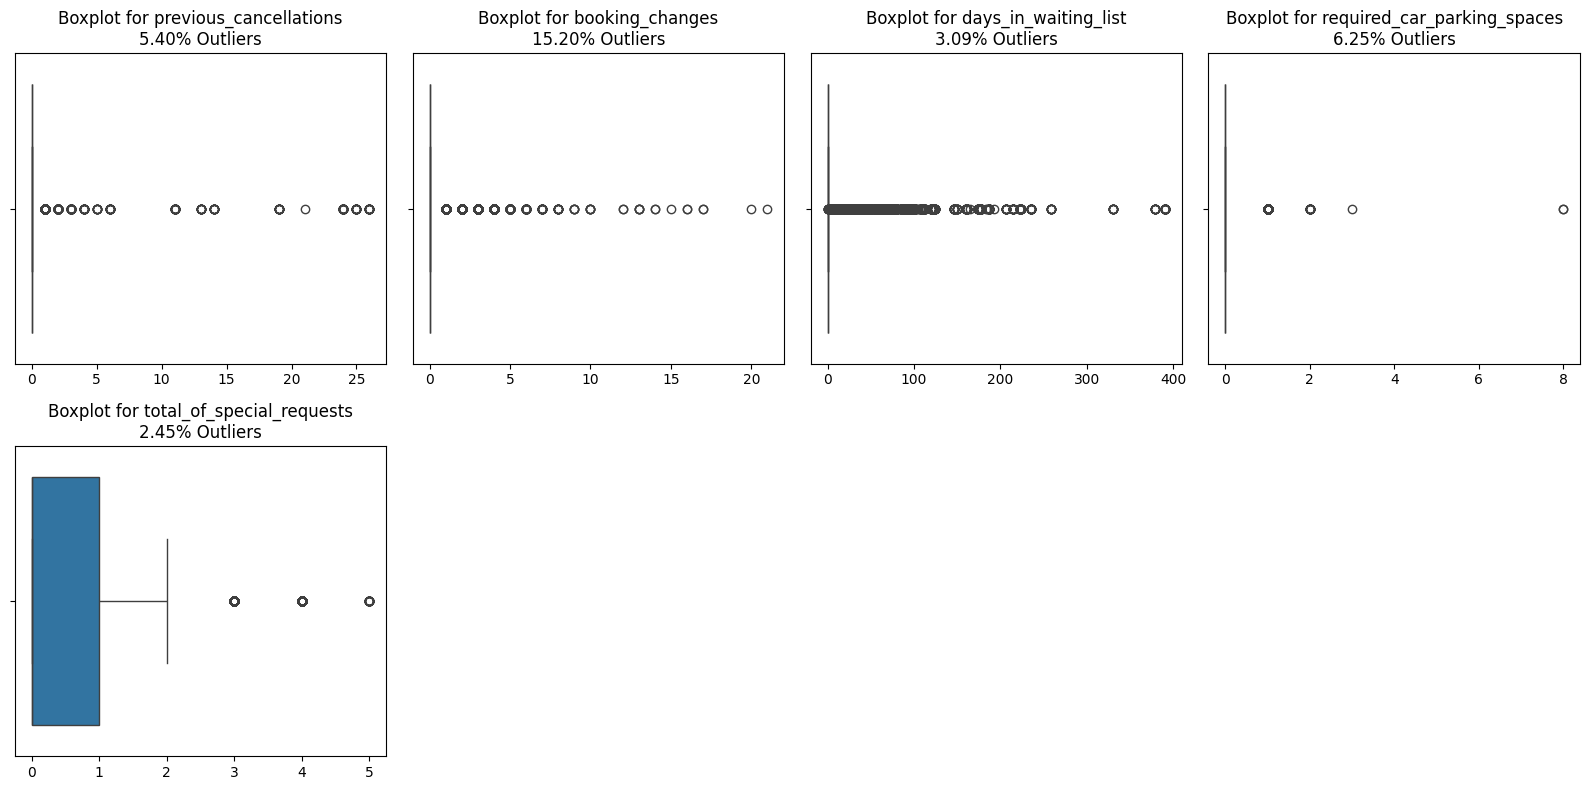

In [33]:
# Identify Outliers

num_cols = [
    "previous_cancellations",
    "booking_changes",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

plt.figure(figsize=(16, 8))
for idx, col in enumerate(num_cols, start=1):
    # IQR Calculation
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    # Upper and Lower Bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Outlier Detection
    outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
    
    sns.boxplot(data=df_eda, x=col, ax=plt.subplot(2, 4, idx))
    plt.title(f"Boxplot for {col}\n{len(outliers)/len(df_eda):.2%} Outliers")
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [34]:
# Check Cardinality
for col in df_eda.select_dtypes("object").columns:  # mengecek pada nilai kategorik
    print(f"{col}: {len(df_eda[col].unique())}")
    print(df_eda[col].value_counts().apply(lambda x: f"{x} ({round(x/len(df_eda)*100, 2)}%)"))
    print()

country: 163
country
PRT    34097 (40.8%)
GBR    8495 (10.16%)
FRA     7307 (8.74%)
ESP     5996 (7.17%)
DEU     5116 (6.12%)
           ...      
DMA         1 (0.0%)
KIR         1 (0.0%)
MYT         1 (0.0%)
KNA         1 (0.0%)
AIA         1 (0.0%)
Name: count, Length: 162, dtype: object

market_segment: 8
market_segment
Online TA        39460 (47.22%)
Offline TA/TO    17025 (20.37%)
Groups           13721 (16.42%)
Direct            8898 (10.65%)
Corporate          3792 (4.54%)
Complementary       511 (0.61%)
Aviation             165 (0.2%)
Undefined              1 (0.0%)
Name: count, dtype: object

deposit_type: 3
deposit_type
No Deposit    73352 (87.77%)
Non Refund     10111 (12.1%)
Refundable       110 (0.13%)
Name: count, dtype: object

customer_type: 4
customer_type
Transient          62732 (75.06%)
Transient-Party    17536 (20.98%)
Contract             2882 (3.45%)
Group                 423 (0.51%)
Name: count, dtype: object

reserved_room_type: 10
reserved_room_type
A    6004

In [41]:
# Menghapus 1 row tertentu
df.drop(df[df['market_segment']=="Undefined"].index, inplace=True)
df_eda.drop(df_eda[df_eda['market_segment']=="Undefined"].index, inplace=True)

### 4.4.2 Feature Correlation Analysis

In [43]:
features = df_eda.drop("is_canceled", axis=1)
TableReport(features)

Processing column  10 / 10


,,,,,,,,,,


## 4.5 Canceled Analysis

In [44]:
features = df_eda.drop("is_canceled", axis=1)
cat_cols = features.select_dtypes("object").columns

for col in cat_cols:
    print(f"column: {col}")
    display(pd.crosstab(df_eda[col], df_eda["is_canceled"], normalize="index").sort_values(by=1, ascending=False))

column: country


is_canceled,0,1
country,,
BHR,0.0,1.0
BEN,0.0,1.0
NIC,0.0,1.0
MYT,0.0,1.0
KHM,0.0,1.0
...,...,...
SUR,1.0,0.0
SLE,1.0,0.0
SDN,1.0,0.0


column: market_segment


is_canceled,0,1
market_segment,,
Groups,0.386925,0.613075
Online TA,0.634237,0.365763
Offline TA/TO,0.659853,0.340147
Aviation,0.787879,0.212121
Corporate,0.819093,0.180907
Direct,0.848618,0.151382
Complementary,0.857143,0.142857


column: deposit_type


is_canceled,0,1
deposit_type,,
Non Refund,0.006231,0.993769
No Deposit,0.717713,0.282287
Refundable,0.790909,0.209091


column: customer_type


is_canceled,0,1
customer_type,,
Transient,0.595645,0.404355
Contract,0.692922,0.307078
Transient-Party,0.744226,0.255774
Group,0.903073,0.096927


column: reserved_room_type


is_canceled,0,1
reserved_room_type,,
P,0.000000,1.000000
H,0.593516,0.406484
A,0.610400,0.389600
G,0.641327,0.358673
L,0.666667,0.333333
B,0.676845,0.323155
C,0.683507,0.316493
D,0.684386,0.315614
F,0.702504,0.297496


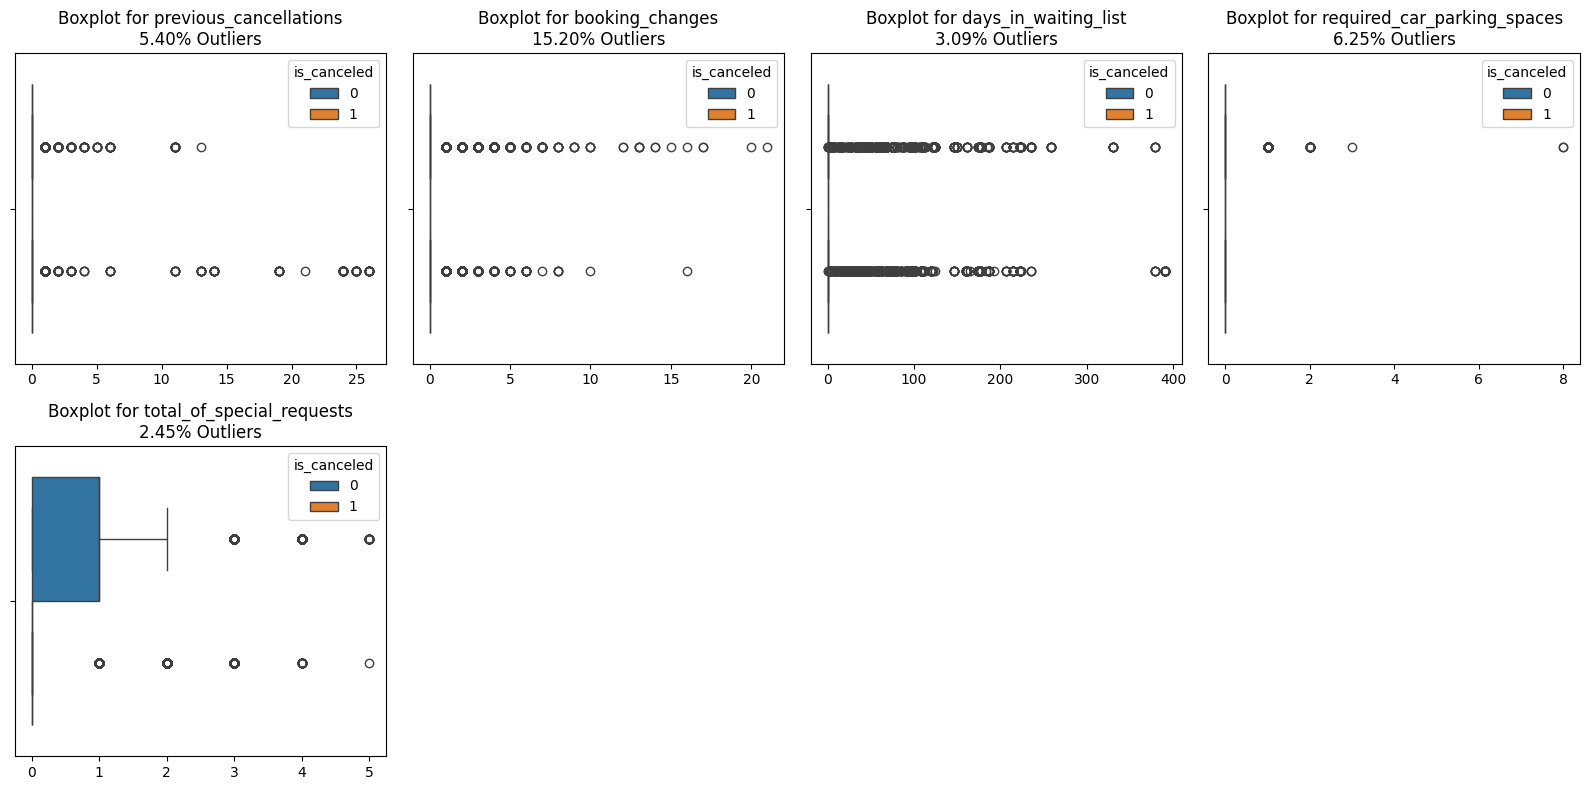

In [45]:
num_cols = [
    "previous_cancellations",
    "booking_changes",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

plt.figure(figsize=(16, 8))
for idx, col in enumerate(num_cols, start=1):
    # IQR Calculation
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    # Upper and Lower Bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Outlier Detection
    outliers = df_eda[(df_eda[col] < lower_bound) | (df_eda[col] > upper_bound)]
    
    sns.boxplot(data=df_eda, x=col, ax=plt.subplot(2, 4, idx), hue="is_canceled")
    plt.title(f"Boxplot for {col}\n{len(outliers)/len(df_eda):.2%} Outliers")
    plt.xlabel("")

plt.tight_layout()
plt.show()

# Section 5: Data Preperation & Feature Engineering

## 5.1 Initilization

### 5.1.1 Define Features and Target

In [46]:
# Define feature and target (from seen data)

X_train = data_train.drop("is_canceled", axis=1)
y_train = data_train["is_canceled"]

X_test = data_test.drop("is_canceled", axis=1)
y_test = data_test["is_canceled"]

---
# Masih berkutat di kolom transformer
---

### 5.1.2 Create Custom Transformer

In [58]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns or []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=[c for c in self.columns if c in X.columns], errors="ignore")
    
class CountryTopNGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, column="country", top_n=10, other_label="Other"):
        self.column = column
        self.top_n = top_n
        self.other_label = other_label
        self.top_values_ = None

    @staticmethod
    def _norm(s: pd.Series) -> pd.Series:
        return (s.astype(str).str.strip().str.upper())

    def fit(self, X, y=None):
        X = X.copy()
        if self.column in X.columns:
            v = self._norm(X[self.column])
            self.top_values_ = v.dropna().value_counts().head(self.top_n).index.tolist()
        else:
            self.top_values_ = []
        return self

    def transform(self, X):
        X = X.copy()
        if self.column in X.columns:
            v = self._norm(X[self.column])
            X[self.column] = v.where(v.isin(self.top_values_), self.other_label)
        return X
        
    def get_feature_names_out(self, input_features=None):
        return [col + "_group" for col in self.fitted_columns_]
    
class CountryRegionGrouper(BaseEstimator, TransformerMixin):
    """
    Map ISO-3 country codes to broad regions to reduce cardinality.
    Unknown/rare codes -> 'Other'.
    """
    def __init__(self, column="country", other_label="Other", drop_original=True):
        self.column = column
        self.other_label = other_label
        self.drop_original = drop_original
        self.mapping_ = None

    @staticmethod
    def _norm(s: pd.Series) -> pd.Series:
        return s.astype(str).str.strip().str.upper()

    def fit(self, X, y=None):
        # Static map; could be extended later
        europe = {
            "PRT","ESP","FRA","DEU","ITA","BEL","IRL","NLD","GBR","CHE","AUT","SWE","NOR","FIN","DNK",
            "ISL","LUX","GRC","POL","CZE","SVK","SVN","HUN","ROU","BGR","HRV","EST","LVA","LTU","ALB",
            "MKD","BIH","SRB","MNE","MDA","UKR","BLR","RUS","AND","SMR","VAT","MCO","GIB","MLT","CYP",
        }
        asia = {
            "CHN","HKG","MAC","TWN","JPN","KOR","PRK","MNG","VNM","THA","KHM","LAO","MMR","MYS","SGP",
            "IDN","PHL","BRN","TLS","IND","PAK","BGD","LKA","NPL","BTN","MDV","KAZ","KGZ","TJK","TKM",
            "UZB","AFG","IRN","IRQ","SYR","JOR","LBN","ISR","PSE","SAU","ARE","QAT","KWT","BHR","OMN",
            "YEM","TUR","ARM","AZE","GEO",
        }
        africa = {
            "DZA","MAR","TUN","LBY","EGY","SDN","SSD","ETH","ERI","DJI","SOM","KEN","UGA","TZA","RWA",
            "BDI","COD","COG","GAB","GNQ","CMR","NGA","NER","TCD","CAF","GNQ","BEN","TGO","GHA","CIV",
            "LBR","SLE","GIN","GNB","SEN","GMB","MLI","MRT","CPV","STP","AGO","NAM","ZAF","BWA","LSO",
            "SWZ","ZMB","ZWE","MDG","MOZ","MWI","COM","SYC","MUS","REU","ESH",
        }
        americas = {
            "USA","CAN","MEX","GTM","BLZ","HND","SLV","NIC","CRI","PAN","CUB","DOM","HTI","PRI","JAM",
            "TTO","BRB","BHS","ATG","DMA","GRD","KNA","LCA","VCT","GLP","MTQ","GUY","SUR","VEN","COL",
            "ECU","PER","BOL","CHL","ARG","PRY","URY","BRA","GUF","BES","CUW","ABW",
        }
        oceania = {
            "AUS","NZL","FJI","PNG","SLB","VUT","WSM","TON","KIR","TUV","NRU","NCL","PYF","WLF","ASM",
        }

        # Build mapping dict
        mapping = {}
        mapping.update({c: "Europe" for c in europe})
        mapping.update({c: "Asia" for c in asia})
        mapping.update({c: "Africa" for c in africa})
        mapping.update({c: "Americas" for c in americas})
        mapping.update({c: "Oceania" for c in oceania})
        self.mapping_ = mapping
        return self
    
    def transform(self, X):
        X = X.copy()
        X["country_region"] = X[self.column].map(self.mapping_).fillna(self.other_label)
        if self.drop_original:
            X.drop(columns=[self.column], inplace=True)
            return X[["country_region"]]
        return X
    
    def get_feature_names_out(self, input_features=None):
        return [col + "_group" for col in self.fitted_columns_]
    
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, columns, whisker=1.5):
        self.columns = columns
        self.whisker = whisker
        self.bounds_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            if col in X.columns:
                s = pd.to_numeric(X[col], errors="coerce").dropna()
                if len(s) > 0:
                    q1, q3 = s.quantile(0.25), s.quantile(0.75)
                    iqr = q3 - q1
                    self.bounds_[col] = (q1 - self.whisker*iqr, q3 + self.whisker*iqr)
        return self

    def transform(self, X):
        X = X.copy()
        for col, (lb, ub) in self.bounds_.items():
            X[col] = pd.to_numeric(X[col], errors="coerce")
            X[col] = X[col].clip(lower=lb, upper=ub).fillna(X[col].median())
        return X

In [110]:
# Tes Custom Transformers untuk Hotel Booking Demand (versi plural cols)
# feature_generator = FeatureGeneratorHotel()
feature_dropper = FeatureDropper(["country"])  # contoh: drop 'country' untuk tes
region_grouper = CountryRegionGrouper(column="country", other_label="Other", drop_original=True)
outlier_clipper = OutlierClipper(columns=[
    "previous_cancellations",
    "booking_changes",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
], whisker=1.5)

# # 1) Tes FeatureGeneratorHotel
# print("=== Feature Generator Output ===")
# display(feature_generator.fit_transform(X_train).head(1))

# 2) Tes FeatureDropper
print("=== Feature Dropper Output ===")
display(feature_dropper.fit_transform(X_train).head(1))

# 3) Tes CountryTopNGrouper
print("=== Country region Grouper Output ===")
display(region_grouper.fit_transform(X_train).sample(5))

# 4) Tes OutlierClipper
print("=== Outlier Clipper Output ===")
display(outlier_clipper.fit_transform(X_train).head(1))


=== Feature Dropper Output ===


,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
64029,Direct,0,4,No Deposit,0,Transient-Party,F,1,0


=== Country region Grouper Output ===


,country_region
67914,Europe
23916,Europe
41223,Europe
27798,Europe
70937,Europe


=== Outlier Clipper Output ===


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
64029,ESP,Direct,0,0,No Deposit,0,Transient-Party,F,0,0.0


## 5.2 Feature Engineering Setup

In [113]:
# Create Transformation Pipeline

# Numerical Features Pipeline
num_pipeline = Pipeline([
    ("missingIndicator", AddMissingIndicator()), # dia bikin kolom tambahan yang berisi True/False
    ("imputer", MeanMedianImputer()), # dia bikin kolom tambahan yang berisi nilai rata-rata (langkah prefentif supaya jika testing ada data yang hilang)
    ("scaler", MinMaxScaler())
])

# Categorical Features Pipeline (OHE)
ohe_pipeline = Pipeline([
    ("missingIndicator", AddMissingIndicator()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Categorical Features Pipeline (binary)
binary_pipeline = Pipeline([
    ("missingIndicator", AddMissingIndicator()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", BinaryEncoder())
])

display(num_pipeline, ohe_pipeline, binary_pipeline)


Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', MeanMedianImputer()), ('scaler', MinMaxScaler())])

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', BinaryEncoder())])

In [141]:
# Advance Transformation Pipeline
# Rare Label Encoding add-on

rare_ohe_pipeline = clone(ohe_pipeline) # clone mirip seperti copy, kalau tidak pakai clone, dia bakal merubah pipeline
rare_ohe_pipeline.steps.insert(1, ("rare_encoder", RareLabelEncoder(tol=0.01, missing_values= "ignore"))) # menambah rare_encoder didalam pipeline

rare_binary_pipeline = clone(binary_pipeline)
rare_binary_pipeline.steps.insert(1, ("rare_encoder", RareLabelEncoder(tol=0.01, missing_values= "ignore")))

display(rare_ohe_pipeline, rare_binary_pipeline)

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('rare_encoder',
                 RareLabelEncoder(missing_values='ignore', tol=0.01)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

Pipeline(steps=[('missingIndicator', AddMissingIndicator()),
                ('rare_encoder',
                 RareLabelEncoder(missing_values='ignore', tol=0.01)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', BinaryEncoder())])

In [142]:
num_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
ohe_features = [ 'deposit_type', 'customer_type']
binary_features = ['country','reserved_room_type','market_segment']

# Baseline Preprocessor
baseline_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", ohe_pipeline, ohe_features),
    ("binary_pipeline", binary_pipeline, binary_features)
], remainder="drop", verbose_feature_names_out=False)


# Baseline Preprocessor + Rare Label Encoding
rare_preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_features),
    ("ohe_pipeline", rare_ohe_pipeline, ohe_features),
    ("binary_pipeline", rare_binary_pipeline, binary_features)
], remainder="drop", verbose_feature_names_out=False)

## 5.3 Feature Engineering Overview

baseline preprocessor

In [143]:
X_train_pre = baseline_preprocessor.fit_transform(X_train)
fe_overview = pd.DataFrame(X_train_pre, columns=baseline_preprocessor.get_feature_names_out())

In [144]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
64029,ESP,Direct,0,4,No Deposit,0,Transient-Party,F,1,0


After Preprocessing:


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,...,0_7,1_0,1_1,1_2,1_3,2_0,2_1,2_2,3_0,3_1
0,0.0,0.190476,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [145]:
X_train_pre = rare_preprocessor.fit_transform(X_train)
fe_overview = pd.DataFrame(X_train_pre, columns=rare_preprocessor.get_feature_names_out())

c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable deposit_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable customer_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable reserved_room_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\featur

In [146]:
print("Before Preprocessing:")
display(X_train.head(1))

print("After Preprocessing:")
display(fe_overview.head(1))

Before Preprocessing:


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
64029,ESP,Direct,0,4,No Deposit,0,Transient-Party,F,1,0


After Preprocessing:


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,...,0_3,1_0,1_1,1_2,1_3,2_0,2_1,2_2,3_0,3_1
0,0.0,0.190476,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# Section 6: Model Development

## 6.1 Initialization

Menentukan model harus berdasarkan parametriknya, agar model tidak salah dalam prediksi menggunakan parameternya.

In [148]:
# Individual Models (Baseline)
models = {
    "Baseline Model": DummyClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifiers": RandomForestClassifier(random_state=42),
    "Adaboost Classifier": AdaBoostClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42)
}

In [149]:
# Main function

def benchmark_models(models: dict, pipeline: Pipeline|ImbPipeline, 
                     X, y, cv=5, scoring_metrics=None, return_raw=False):
    """
    Run cross-validated benchmarking across multiple models.

    Parameters:
    - models: dict of {model_name: model_object}
    - X: Features
    - y: Target labels
    - cv: Cross-validation folds (int or CV splitter)
    - scoring_metrics: dict of scorers (default: PR-AUC and Business Impact)
    - return_raw: if True, returns full raw result dictionary

    Returns:
    - DataFrame with mean and std of each metric per model
    """
    if scoring_metrics is None:
        scoring_metrics = {
            "pr_auc": "average_precision"}

    results = []

    for name, model in models.items():
        print(f"Evaluating {name}...    ", end="")
        clf = clone(pipeline) # ensure independence
        clf.set_params(classifier=model)
        cv_result = cross_validate(
            clf,
            X, y,
            cv=cv,
            scoring=scoring_metrics,
            return_train_score=True,
            n_jobs=-1
        )

        result_summary = {
            "Model": name
        }

        for metric_key in scoring_metrics:
            train_scores = cv_result[f'train_{metric_key}']
            result_summary[f"Train {metric_key.upper()} Mean"] = np.mean(train_scores)
            result_summary[f"Train {metric_key.upper()} Std"] = np.std(train_scores)

            test_scores = cv_result[f'test_{metric_key}']
            result_summary[f"Test {metric_key.upper()} Mean"] = np.mean(test_scores)
            result_summary[f"Test {metric_key.upper()} Std"] = np.std(test_scores)

            result_summary["Fit Time Mean"] = np.mean(cv_result["fit_time"])
            result_summary["Score Time Mean"] = np.mean(cv_result["score_time"])

        if return_raw:
            result_summary["Raw"] = cv_result

        results.append(result_summary)

        print("Done!")

    return pd.DataFrame(results).sort_values(by="Test PR_AUC Mean", ascending=False)


## 6.2 Pipeline Setup

In [151]:
# Baseline Pipeline
baseline_pipeline = ImbPipeline([
    ("preprocessor", baseline_preprocessor),
    ("classifier", models["Baseline Model"])
])

baseline_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['country',
                                                   'reserved_room_type',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('classifier', DummyClassifier())])

In [152]:
# Advance Pipeline

# Baseline Pipeline + Resample
baseline_pipeline_resample = ImbPipeline([
    ("preprocessor", baseline_preprocessor),
    ("resample", SMOTE(random_state=42)),
    ("classifier", models["Baseline Model"])
])

baseline_pipeline_resample

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                                                  ['deposit_type',
                                                   'customer_type']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['country',
                                                   'reserved_room_type',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('resample', SMOTE(random_state=42)),
                ('classifier', DummyClassifier())])

In [153]:
# Pipeline Testing

cv_result = cross_validate(
    baseline_pipeline,
    X_train, y_train,
    cv=5,
    scoring={"pr_auc": "average_precision"},
    return_train_score=True
)
cv_result

{'fit_time': array([0.26894903, 0.25687575, 0.26648307, 0.25500417, 0.24475861]),
 'score_time': array([0.04028058, 0.04085684, 0.04549432, 0.04077387, 0.03808141]),
 'test_pr_auc': array([0.36829314, 0.36823408, 0.36823408, 0.36823408, 0.36832757]),
 'train_pr_auc': array([0.36825746, 0.36827222, 0.36827222, 0.36827222, 0.36824885])}

In [154]:
# Model benchmarking using Stratified K-Fold
sf = StratifiedKFold(n_splits=5)

## 6.3 Model Benchmarking
Select best model based on cross-validation result

pastikan sebelum mencari pipeline utama melalui experiment, kita sudah membuat rencana mana saja yang akan dicoba

### Experiment 1. Select Best Preprocessor

- 1.1 Baseline Preprocessing (`bcmk_baseline`)
- 1.2 Grouping Transaction Description

kita bisa melihat kalau memang proses modelnya cenderung lama maka model tersebut bisa di takeout supaya tidak menghabiskan waktu

In [155]:
# 1.1 Baseline Preprocessing
bcmk_baseline = benchmark_models(models, baseline_pipeline, 
                                 X_train, y_train, cv=sf)

Evaluating Baseline Model...    Done!
Evaluating Decision Tree Classifier...    Done!
Evaluating Logistic Regression...    Done!
Evaluating Random Forest Classifiers...    Done!
Evaluating Adaboost Classifier...    Done!
Evaluating XGBoost Classifier...    Done!


In [156]:
bcmk_baseline

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean
5,XGBoost Classifier,0.860647,0.001098,0.851011,0.004831,1.332926,0.089074
3,Random Forest Classifiers,0.881283,0.000665,0.844089,0.003263,3.460884,0.225922
1,Decision Tree Classifier,0.882361,0.000660,0.810935,0.001719,0.479542,0.054142
2,Logistic Regression,0.791164,0.004173,0.791654,0.008363,0.774913,0.060985
4,Adaboost Classifier,0.785585,0.007095,0.785978,0.008933,2.324776,0.155054
0,Baseline Model,0.368265,0.000010,0.368265,0.000039,0.381169,0.060994


Top 3 Models
- XGBoost
- Random Forest
- Decision Tree

Train with 
- Baseline with Rare Label Handing 

In [157]:
top_model = ["Random Forest Classifiers", "XGBoost Classifier", "Decision Tree Classifier"]

model_candidate = models.copy()
model_candidate = {k: model_candidate[k] for k in model_candidate if k in top_model}

In [158]:
# 1.3 Baseline Preprocessing with Rare Label handling

baseline_rare = clone(baseline_pipeline)
baseline_rare.set_params(preprocessor = rare_preprocessor)

bmck_baseline_rare = benchmark_models(model_candidate, baseline_rare, 
                                      X_train, y_train, cv=sf)

Evaluating Decision Tree Classifier...    Done!
Evaluating Random Forest Classifiers...    Done!
Evaluating XGBoost Classifier...    Done!


In [159]:
bmck_baseline_rare

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean
2,XGBoost Classifier,0.857168,0.000743,0.849487,0.004653,1.314489,0.098848
1,Random Forest Classifiers,0.870010,0.000844,0.842485,0.003931,2.972450,0.218963
0,Decision Tree Classifier,0.870723,0.000837,0.819612,0.002814,0.491886,0.063720


In [162]:
all_experiment = [
    bcmk_baseline.head(),
    bmck_baseline_rare.head()
]
summary = pd.concat(all_experiment).sort_values("Test PR_AUC Mean", ascending=False)
summary.head(3)

,Model,Train PR_AUC Mean,Train PR_AUC Std,Test PR_AUC Mean,Test PR_AUC Std,Fit Time Mean,Score Time Mean
5,XGBoost Classifier,0.860647,0.001098,0.851011,0.004831,1.332926,0.089074
2,XGBoost Classifier,0.857168,0.000743,0.849487,0.004653,1.314489,0.098848
3,Random Forest Classifiers,0.881283,0.000665,0.844089,0.003263,3.460884,0.225922


Best Result
- XGBoost + Baseline
- XGBoost + Baseline rare

### Experiment 2. Try with Resampling

#### Model 1. XGBoost

In [163]:
# Model 1: XGBoost Baseline Classifier

xgb_baseline = clone(baseline_pipeline)
xgb_baseline.set_params(preprocessor = baseline_preprocessor,
                        classifier = models["XGBoost Classifier"])
xgb_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [164]:
# Predict and Score
pred_train = xgb_baseline.predict(X_train)
pred_test = xgb_baseline.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  0.6569054912342427
Test PR-AUC:  0.6459474506205299
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     33789
           1       0.78      0.70      0.74     19697

    accuracy                           0.82     53486
   macro avg       0.81      0.79      0.80     53486
weighted avg       0.82      0.82      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      8447
           1       0.77      0.69      0.73      4925

    accuracy                           0.81     13372
   macro avg       0.80      0.78      0.79     13372
weighted avg       0.81      0.81      0.81     13372



In [165]:
resampler = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),  #
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Near Miss": NearMiss()
}

In [166]:
# Model 1: XGBoost Baseline Classifier
# Experiment 2. Try different resampling

xgb_baseline = clone(baseline_pipeline_resample)
xgb_baseline.set_params(preprocessor = baseline_preprocessor,
                        classifier = XGBClassifier(random_state=42))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [167]:
search_resampler_xgboost = GridSearchCV(
    estimator=xgb_baseline,
    param_grid={"resample": list(resampler.values())},
    scoring="average_precision",
    cv=sf,
    return_train_score=True,
    verbose=1
)

search_resampler_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          MeanMedianImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['previous_cancellations',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'resample': [SMOTE(random_state=42),
                                      RandomOverSampler(random_state=42),
                                      RandomUnderSampler(random_state=42),
                                      NearMiss()]},
             return_train_score=True, scoring='average_precision', verbose=1)

In [168]:
search_resampler_xgboost.best_params_

{'resample': RandomOverSampler(random_state=42)}

In [169]:
search_resampler_xgboost.best_score_

np.float64(0.8506462508405696)

In [170]:
pd.DataFrame(search_resampler_xgboost.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.625482,0.055731,0.061566,0.003764,RandomOverSampler(random_state=42),{'resample': RandomOverSampler(random_state=42)},0.852921,0.849500,0.852535,0.854843,...,0.850646,0.003993,1,0.861332,0.860595,0.859237,0.858638,0.861973,0.860355,0.001251
0,1.607312,1.471017,0.057801,0.004422,SMOTE(random_state=42),{'resample': SMOTE(random_state=42)},0.853431,0.847415,0.853125,0.855717,...,0.850260,0.005118,2,0.859428,0.858685,0.858969,0.857775,0.859707,0.858913,0.000670
2,0.540611,0.041806,0.070189,0.013567,RandomUnderSampler(random_state=42),{'resample': RandomUnderSampler(random_state=42)},0.851533,0.847767,0.852760,0.856056,...,0.850055,0.004755,3,0.859173,0.860365,0.859053,0.858164,0.860598,0.859471,0.000899
3,0.965300,0.037596,0.056644,0.001613,NearMiss(),{'resample': NearMiss()},0.734339,0.735653,0.775847,0.766487,...,0.756886,0.018124,4,0.742351,0.747941,0.777982,0.770602,0.787436,0.765263,0.017360


In [171]:
# Predict and Score
pred_train_resample = search_resampler_xgboost.best_estimator_.predict(X_train)
pred_test_resample = search_resampler_xgboost.best_estimator_.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_resample))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_resample))

Train PR-AUC:  0.6396519643067553
Test PR-AUC:  0.6253798218711454
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     33789
           1       0.70      0.81      0.75     19697

    accuracy                           0.80     53486
   macro avg       0.79      0.81      0.80     53486
weighted avg       0.81      0.80      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8447
           1       0.69      0.79      0.74      4925

    accuracy                           0.79     13372
   macro avg       0.78      0.79      0.78     13372
weighted avg       0.80      0.79      0.80     13372



In [172]:
print("Summary XGB Baseline Classifier")
print("\nBefore Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

print("\nAfter Tunning:")
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

Summary XGB Baseline Classifier

Before Tunning:
Train PR-AUC:  0.6569054912342427
Test PR-AUC:  0.6459474506205299

After Tunning:
Train PR-AUC:  0.6396519643067553
Test PR-AUC:  0.6253798218711454


In [174]:
# Model 2: XGBoost rare Baseline Classifier

xgb_rare_baseline = clone(baseline_pipeline)
xgb_rare_baseline.set_params(preprocessor = rare_preprocessor,
                        classifier = models["XGBoost Classifier"])
xgb_baseline.fit(X_train, y_train)

c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable deposit_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable customer_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable reserved_room_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\featur

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [175]:
# Predict and Score
pred_train = xgb_rare_baseline.predict(X_train)
pred_test = xgb_rare_baseline.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  0.6536713487943547
Test PR-AUC:  0.64631322586392
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     33789
           1       0.78      0.70      0.74     19697

    accuracy                           0.82     53486
   macro avg       0.81      0.79      0.80     53486
weighted avg       0.81      0.82      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      8447
           1       0.77      0.69      0.73      4925

    accuracy                           0.81     13372
   macro avg       0.80      0.79      0.79     13372
weighted avg       0.81      0.81      0.81     13372



#### Model 2. XGBoost Rare Baseline

In [ ]:
# Model 2: XGBoost rare Baseline Classifier

XGB_rare_baseline_resample = clone(baseline_pipeline_resample)
XGB_rare_baseline_resample.set_params(preprocessor = rare_preprocessor,
                        classifier = models["XGBoost Classifier"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [178]:
search_resampler_xgboost = GridSearchCV(
    estimator=XGB_rare_baseline_resample,
    param_grid={"resample": list(resampler.values())},
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_resampler_xgboost.fit(X_train, y_train)

c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable deposit_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable customer_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable reserved_room_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\LENOVO LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\featur

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          MeanMedianImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['previous_cancellations',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'resample': [SMOTE(random_state=42),
                                      RandomOverSampler(random_state=42),
                                      RandomUnderSampler(random_state=42),
                                      NearMiss()]},
             return_train_score=True, scoring='average_precision')

In [179]:
search_resampler_xgboost.best_params_

{'resample': SMOTE(random_state=42)}

In [180]:
search_resampler_xgboost.best_score_

np.float64(0.8490084393321753)

In [181]:
pd.DataFrame(search_resampler_xgboost.cv_results_).sort_values("mean_test_score", ascending=False).head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.917076,0.057002,0.061986,0.002359,SMOTE(random_state=42),{'resample': SMOTE(random_state=42)},0.852502,0.846646,0.850334,0.854662,...,0.849008,0.004843,1,0.855936,0.856100,0.855312,0.854672,0.857176,0.855839,0.000837
1,0.669315,0.025893,0.065984,0.002438,RandomOverSampler(random_state=42),{'resample': RandomOverSampler(random_state=42)},0.851900,0.847703,0.851012,0.853633,...,0.848952,0.004640,2,0.855977,0.856995,0.855806,0.855351,0.857833,0.856392,0.000899
2,0.633096,0.048130,0.064735,0.003081,RandomUnderSampler(random_state=42),{'resample': RandomUnderSampler(random_state=42)},0.851485,0.847243,0.850271,0.853086,...,0.848488,0.004494,3,0.855303,0.855729,0.855333,0.854604,0.857468,0.855687,0.000961
3,0.983506,0.030375,0.063029,0.004553,NearMiss(),{'resample': NearMiss()},0.725991,0.726043,0.701018,0.766879,...,0.735088,0.023465,4,0.729062,0.730609,0.702483,0.772271,0.767887,0.740463,0.026205


In [182]:
# Predict and Score
pred_train_resample = search_resampler_xgboost.best_estimator_.predict(X_train)
pred_test_resample = search_resampler_xgboost.best_estimator_.predict(X_test)

# PR-AUC Score
print("Train PR-AUC: ", average_precision_score(y_train, pred_train_resample))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_resample))

# Classification Report
print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_resample))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_resample))

Train PR-AUC:  0.6379791213668222
Test PR-AUC:  0.6278844212062213
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     33789
           1       0.71      0.79      0.75     19697

    accuracy                           0.80     53486
   macro avg       0.79      0.80      0.79     53486
weighted avg       0.81      0.80      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      8447
           1       0.70      0.78      0.74      4925

    accuracy                           0.80     13372
   macro avg       0.78      0.79      0.79     13372
weighted avg       0.80      0.80      0.80     13372



## 6.4 Tunning Model

Best Model: Xgboost Baseline Classfier with Resampling (RandomOverSampler)

#### 6.4.1 Model Before Tunning (Baseline with oversampling)

In [183]:
# Final Model
# XGboost Baseline Classifier with Oversampling

final_model = clone(baseline_pipeline_resample)
final_model.set_params(preprocessor = baseline_preprocessor,
                       resample = resampler["Random Oversampling"],
                       classifier = models["XGBoost Classifier"])
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [184]:
final_model.named_steps["classifier"].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### 6.4.2 Searching Best Parameters (Hyperparameter Tunning) #1

Experiment #1
- N Estimators (100, 1000)
- Learning Rate (0.1, 0.01)
- Maximum Depth (3, 9)

In [185]:
param_dist = {
    "classifier__n_estimators": [100, 1000, None],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__max_depth": [3, 9]
}

search_best_model = GridSearchCV(
    estimator=final_model,
    param_grid=param_dist,
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_best_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          MeanMedianImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['previous_cancellations',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 9],
                         'classifier__n_estimators': [100, 1000, None]},
             return_train_score=True, scoring='average_precision')

In [186]:
print(search_best_model.best_params_)
print(search_best_model.best_score_)

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 9, 'classifier__n_estimators': 1000}
0.8503576957652049


In [187]:
param_dist = {
    "classifier__n_estimators": [500, 1000, 1300],
    "classifier__learning_rate": [0.1, 0.5],
    "classifier__max_depth": [5, 9, 12]
}

search_best_model = GridSearchCV(
    estimator=final_model,
    param_grid=param_dist,
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_best_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          MeanMedianImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['previous_cancellations',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.5],
                         'classifier__max_depth': [5, 9, 12],
                         'classifier__n_estimators': [500, 1000, 1300]},
             return_train_score=True, scoring='average_precision')

In [188]:
print(search_best_model.best_params_)
print(search_best_model.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 1300}
0.8514504799568036


In [189]:
param_dist = {
    "classifier__n_estimators": [1300, 2000],
    "classifier__learning_rate": [0.1, 0.3],
    "classifier__max_depth": [4, 5, 7]
}

search_best_model = GridSearchCV(
    estimator=final_model,
    param_grid=param_dist,
    scoring="average_precision",
    cv=sf,
    return_train_score=True
)

search_best_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('missingIndicator',
                                                                                          AddMissingIndicator()),
                                                                                         ('imputer',
                                                                                          MeanMedianImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['previous_cancellations',
                                                                          'booking_changes',
                                                                          'days_in_waiting_list...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.3],
                         'classifier__max_depth': [4, 5, 7],
                         'classifier__n_estimators': [1300, 2000]},
             return_train_score=True, scoring='average_precision')

In [190]:
print(search_best_model.best_params_)
print(search_best_model.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 1300}
0.8514504799568036


In [191]:
final_model = clone(baseline_pipeline_resample)
final_model.set_params(preprocessor = baseline_preprocessor,
                       resample = resampler["Random Oversampling"],
                       classifier = models["XGBoost Classifier"])
final_model.fit(X_train, y_train)

pred_train = final_model.predict(X_train)
pred_test = final_model.predict(X_test)

print("Train PR-AUC: ", average_precision_score(y_train, pred_train))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test))

print("Classification Report (Train): ")
print(classification_report(y_train, pred_train))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test))

Train PR-AUC:  0.6396519643067553
Test PR-AUC:  0.6253798218711454
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     33789
           1       0.70      0.81      0.75     19697

    accuracy                           0.80     53486
   macro avg       0.79      0.81      0.80     53486
weighted avg       0.81      0.80      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8447
           1       0.69      0.79      0.74      4925

    accuracy                           0.79     13372
   macro avg       0.78      0.79      0.78     13372
weighted avg       0.80      0.79      0.80     13372



In [192]:
final_model_tuned = clone(search_best_model.best_estimator_)
final_model_tuned.fit(X_train, y_train)

pred_train_tuned = final_model_tuned.predict(X_train)
pred_test_tuned = final_model_tuned.predict(X_test)

print("Train PR-AUC: ", average_precision_score(y_train, pred_train_tuned))
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_tuned))

print("Classification Report (Train): ")
print(classification_report(y_train, pred_train_tuned))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_tuned))

Train PR-AUC:  0.6425206723215316
Test PR-AUC:  0.6243488254509654
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     33789
           1       0.71      0.81      0.76     19697

    accuracy                           0.81     53486
   macro avg       0.79      0.81      0.80     53486
weighted avg       0.82      0.81      0.81     53486

Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8447
           1       0.69      0.79      0.74      4925

    accuracy                           0.79     13372
   macro avg       0.78      0.79      0.78     13372
weighted avg       0.80      0.79      0.80     13372



## 6.5 Model Analysis

### 6.5.1 Evaluate on Testing Model

In [193]:
pred_test_tuned = final_model_tuned.predict(X_test)
print("Test PR-AUC: ", average_precision_score(y_test, pred_test_tuned))
print("Classification Report (Test): ")
print(classification_report(y_test, pred_test_tuned))

Test PR-AUC:  0.6243488254509654
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8447
           1       0.69      0.79      0.74      4925

    accuracy                           0.79     13372
   macro avg       0.78      0.79      0.78     13372
weighted avg       0.80      0.79      0.80     13372



### 6.5.2 Residual Analysis

#### Confusion Matrix Inspection

klasifikasi bisa pakai confusion metrik

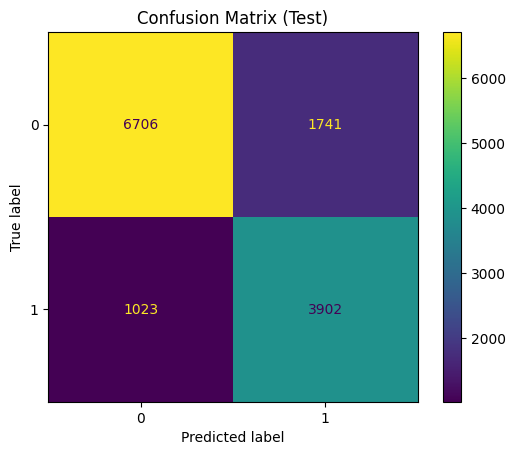

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model_tuned, X_test, y_test)
plt.title("Confusion Matrix (Test)")
plt.show()

#### Classification Report

In [195]:
print("PR-AUC: ", average_precision_score(y_test, pred_test_tuned))
print("Classification Report: ")
print(classification_report(y_test, pred_test_tuned))

PR-AUC:  0.6243488254509654
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8447
           1       0.69      0.79      0.74      4925

    accuracy                           0.79     13372
   macro avg       0.78      0.79      0.78     13372
weighted avg       0.80      0.79      0.80     13372



#### Weak Performance Analysis

In [196]:
def weak_performance_analysis(model, X_test, y_test, feature_df=None, target_names=None):
    """
    Analisis performa buruk dari model klasifikasi.
    
    Parameters:
    - model: trained sklearn model
    - X_test: features untuk testing
    - y_test: target aslinya
    - feature_df: DataFrame asli dari X_test (untuk analisis subgroup)
    - target_names: nama dari kelas target
    """
    y_pred = model.predict(X_test)

    # 1. Error Analysis
    errors = y_pred != y_test
    print(f"\nTotal Errors: {np.sum(errors)} / {len(y_test)}")
    error_rate = np.mean(errors)
    print(f"Error Rate: {error_rate:.2%}")

    # 2. Analisis per Kelas
    print("\n=== Weak Class Performance ===")
    report = classification_report(y_test, y_pred, output_dict=True)
    class_df = pd.DataFrame(report).T
    weak_classes = class_df[(class_df.index != 'accuracy') & (class_df['f1-score'] < 0.6)]
    print(weak_classes[['precision', 'recall', 'f1-score']])

    # 3. Optional: Analisis berdasarkan fitur/segmentasi
    if feature_df is not None:
        print("\n=== Segment-wise Error Rate ===")
        feature_df = feature_df.copy()
        feature_df['actual'] = y_test
        feature_df['predicted'] = y_pred
        feature_df['error'] = feature_df['actual'] != feature_df['predicted']

        for col in feature_df.select_dtypes(include=['object', 'category']).columns:
            print(f"\n>> Error rate by '{col}':")
            print(
                feature_df.groupby(col)['error']
                .mean()
                .sort_values(ascending=False)
                .apply(lambda x: f"{x:.2%}")
            )



In [197]:
# Weak Performance Analysis

weak_performance_analysis(final_model_tuned, X_test, y_test, feature_df=X_test, target_names=["Not Canceled", "Canceled"])


Total Errors: 2764 / 13372
Error Rate: 20.67%

=== Weak Class Performance ===
Empty DataFrame
Columns: [precision, recall, f1-score]
Index: []

=== Segment-wise Error Rate ===

>> Error rate by 'country':
country
BHR    100.00%
GAB    100.00%
ETH    100.00%
CRI    100.00%
PAK    100.00%
        ...   
PER      0.00%
TUN      0.00%
TJK      0.00%
SVK      0.00%
VNM      0.00%
Name: error, Length: 108, dtype: object

>> Error rate by 'market_segment':
market_segment
Online TA        30.91%
Aviation         21.43%
Complementary    18.68%
Direct           15.91%
Offline TA/TO    12.14%
Corporate        11.43%
Groups            7.26%
Name: error, dtype: object

>> Error rate by 'deposit_type':
deposit_type
Refundable    25.00%
No Deposit    23.38%
Non Refund     0.32%
Name: error, dtype: object

>> Error rate by 'customer_type':
customer_type
Transient          23.46%
Transient-Party    13.33%
Group               9.09%
Contract            7.31%
Name: error, dtype: object

>> Error rate by 

### 6.5.3 Learning Curve Inspection

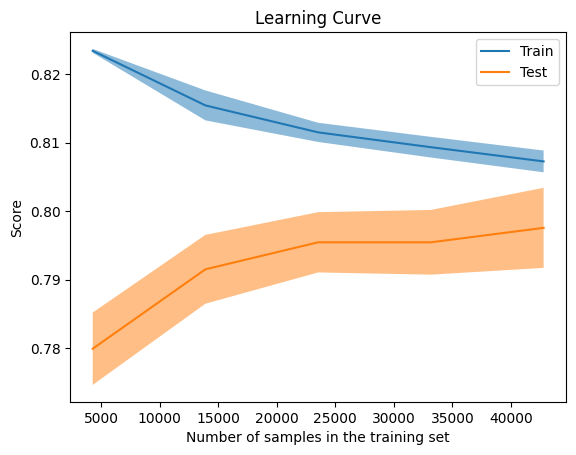

In [198]:
LearningCurveDisplay.from_estimator(
    final_model_tuned,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=sf,
    random_state=42
)
plt.title("Learning Curve")
plt.show()

## 6.6 Model Explanation and Interpretation

### 6.6.1 Explanation using Feature Importances

In [199]:
# Feature Importances

feature_importances = final_model_tuned.named_steps["classifier"].feature_importances_
feature_names = final_model_tuned.named_steps["preprocessor"].get_feature_names_out()
feature_importances_df = pd.DataFrame(
    {"feature": feature_names, "importance": feature_importances}
).sort_values("importance", ascending=False)

top10 = feature_importances_df.head(10)
top10

,feature,importance
5,deposit_type_Non Refund,0.624986
3,required_car_parking_spaces,0.214680
17,0_7,0.020949
22,2_0,0.018466
23,2_1,0.018057
15,0_5,0.016558
0,previous_cancellations,0.013420
24,2_2,0.013351
8,customer_type_Transient,0.013325
9,customer_type_Transient-Party,0.008048


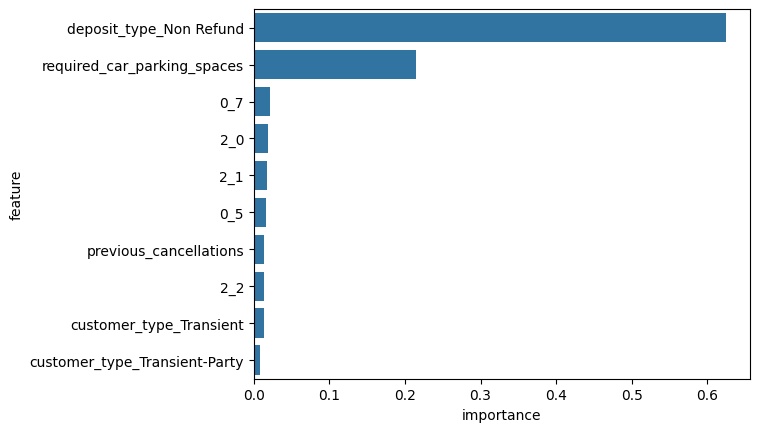

In [200]:
sns.barplot(x="importance", y="feature", data=top10)
plt.show()

### 6.6.2 Explanation using Surrogate Models

In [201]:
surrogate_models = clone(final_model_tuned)
surrogate_models.set_params(classifier = models["Logistic Regression"])

surrogate_models.fit(X_test, pred_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   MeanMedianImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ohe_pipeline',
                                                  Pipeline...
                                                   'customer_type']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('missingIndicator',
                                                                   AddMissingIndicator()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['country',
                                                   'reserved_room_type',
                                                   'market_segment'])],
                                   verbose_feature_names_out=False)),
                ('resample', RandomOverSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [202]:
logreg_models = surrogate_models.named_steps["classifier"]
feature_names = surrogate_models.named_steps["preprocessor"].get_feature_names_out()

coef = pd.DataFrame(logreg_models.coef_, columns = feature_names, index=["coef"]).T
coef["coef_abs"] = coef["coef"].abs()
coef = coef.sort_values("coef_abs", ascending=False)
top10 = coef.head(10)
top10

,coef,coef_abs
booking_changes,-10.893900,10.893900
total_of_special_requests,-9.502749,9.502749
required_car_parking_spaces,-9.304401,9.304401
deposit_type_Non Refund,3.742415,3.742415
2_2,-2.548944,2.548944
previous_cancellations,2.408089,2.408089
customer_type_Group,-1.946814,1.946814
0_5,-1.787442,1.787442
3_0,-1.615174,1.615174
customer_type_Transient-Party,-1.509732,1.509732


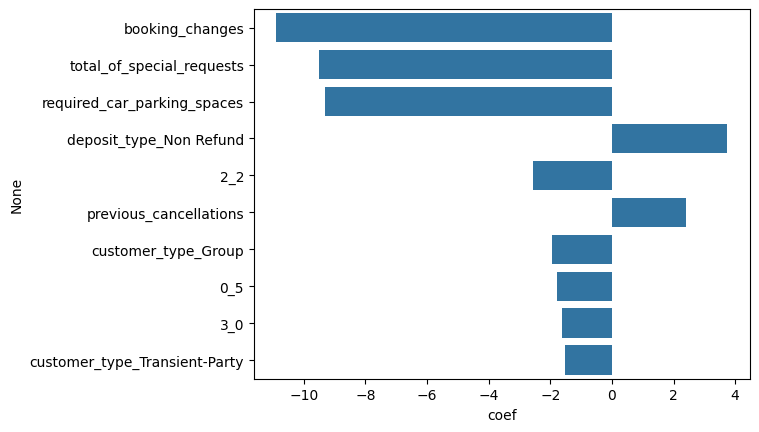

In [203]:
sns.barplot(x="coef", y=top10.index, data=top10)
plt.show()

# **Section 7: Model Deployment**

In [ ]:
# import joblib

# # misal nama variabel model kamu adalah 'clf'
# joblib.dump(clf, 'hotel_booking_model.joblib')
# print("Model saved as hotel_booking_model.joblib")


In [205]:
import joblib

feature = data_seen.drop("is_canceled", axis=1)
target = data_seen["is_canceled"]

final_model_tuned.fit(feature, target)
with open("Hotel_Booking_xgb1300_over.joblib", "wb") as f:
    joblib.dump(final_model_tuned, f)

---
# Testing Area
---

In [138]:
df.isna().any()

country                        False
market_segment                 False
previous_cancellations         False
booking_changes                False
deposit_type                   False
days_in_waiting_list           False
customer_type                  False
reserved_room_type             False
required_car_parking_spaces    False
total_of_special_requests      False
is_canceled                    False
dtype: bool

In [118]:
TableReport(df)

Processing column  11 / 11


,,,,,,,,,,,


In [133]:
df[df['required_car_parking_spaces']>1]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
789,PRT,Online TA,0,0,No Deposit,0,Transient-Party,A,2,1,0
1044,GBR,Online TA,0,0,No Deposit,0,Transient,A,2,1,0
1467,ESP,Online TA,0,0,No Deposit,0,Transient,D,2,2,0
15501,GBR,Groups,0,4,No Deposit,0,Transient-Party,A,2,0,0
21979,AUT,Direct,0,1,No Deposit,122,Transient-Party,E,8,0,0
23899,FRA,Online TA,0,0,No Deposit,0,Transient,D,2,1,0
26977,ESP,Online TA,0,0,No Deposit,0,Transient-Party,A,3,2,0
30674,POL,Online TA,0,0,No Deposit,0,Transient,A,2,2,0
34346,PRT,Direct,0,0,No Deposit,0,Transient,A,2,0,0
35802,AUT,Direct,0,1,No Deposit,0,Transient-Party,E,8,1,0
